# MACHINE LEARNING MODEL FOR TRAFFIC SIGN DETECTION

##        CONVOLUTIONAL NEURAL NETWORKS
---

### Project Description
---

Traffic signs have been designed to be easily recognizable by the human brain, however for computer systems this classification continues to present its limitations in the recognition of their patterns.

This project consists of creating a predictive Machine Learning model for the automated recognition of traffic signs.

For our objective we are going to compare a traditional Super Vector Machine (SVM) classification model and a model based on convolutional neural networks (CNN), we will be changing its hyperparameters to solve its complexity and make the comparison of its results and the margin of error. that each one of them offers us.

For this study, we will use the data set compiled in real time during more than 10 hours of work by the Group Vision team of the German Traffic Sign Recognition Benchmark (GTSRB).

Finally we will stay with the best prediction result offered to us and we will create a traffic sign detector in images based on Deep Learning.

#### Dataset : 

+   Single-image, multi-class classification problem
+   More than 40 classes
+   More than 50,000 images in total
+   Large, lifelike database

#### Structure

+   The training set archive is structures as follows:
+   One directory per class
+   Each directory contains one CSV file with annotations ("GT-<ClassID>.csv") and the training images
+   Training images are grouped by tracks
+   Each track contains 30 images of one single physical traffic sign

#### Image format

+   The images contain one traffic sign each
+   Images contain a border of 10 % around the actual traffic sign (at least 5 pixels) to allow for edge-based approaches
+   Images are stored in PPM format (Portable Pixmap, P6)
+   Image sizes vary between 15x15 to 250x250 pixels
+   Images are not necessarily squared
+   The actual traffic sign is not necessarily centered within the image.This is true for images that were close to the image border in the full camera image
+   The bounding box of the traffic sign is part of the annotatinos (see below)


#### Keywords:
+   Artificial vision,
+   Deep Learning,
+   Object Detection,
+   Supervised Learning,
+   Neural Networks.

## Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np 
#path
from utils import folders_tb as f

#visualization
from utils import visualization_tb as vt
from matplotlib.image import imread
import matplotlib.pyplot as plt

#redimension
import cv2 as cv

#path
import os
from os import listdir
from os.path import isfile, join

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
training_set = pd.read_csv(f.curr_path() + os.sep + 'data' + os.sep + "Train.csv")
training_set.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [4]:
test_set = pd.read_csv(f.curr_path() + os.sep + 'data' + os.sep + "Test.csv")
test_set.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [5]:
print("Dataset Training:",training_set.shape)
print("Dataset Test:",test_set.shape)

Dataset Training: (39209, 8)
Dataset Test: (12630, 8)


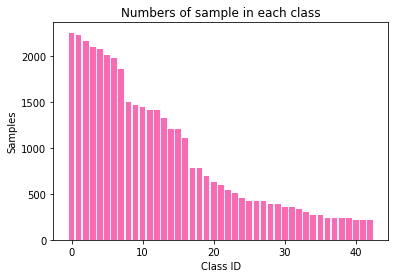

In [6]:
vt.frequency_class(training_set)

## Feature Engineering

#### Pixeles Dimensions

Our data set is made up of images with different pixel sizes, we need to explore them and know what their minimum size is, since to train our model we have to resize the images all to the same size, so we will choose the smallest of the sizes in pixels for each of them.

It has been verified that the smallest dimensions have been 25x26 and 26x27; so we will take as a basis to resize the images to 25x25



In [7]:
pixeles_train = f.pixel_size(training_set,"Width")
pixeles_test = f.pixel_size(test_set,"Width")


In [8]:
pixeles_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
995,25,26,5,6,20,21,38,Test/00995.png
745,25,41,5,6,20,36,17,Test/00745.png
11859,25,27,5,6,20,21,9,Test/11859.png
1477,25,26,5,5,20,21,35,Test/01477.png
10937,25,27,5,5,20,22,8,Test/10937.png


In [9]:
pixeles_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
2970,25,27,5,6,20,21,2,Train/2/00002_00006_00000.png
24457,25,32,5,5,20,27,17,Train/17/00017_00000_00007.png
8010,25,27,5,5,20,22,4,Train/4/00004_00052_00000.png
10560,25,27,5,5,20,22,6,Train/6/00006_00009_00000.png
35461,25,26,5,5,20,21,36,Train/36/00036_00002_00002.png


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

from tensorflow import keras
from tensorflow.keras import layers

In [11]:
batch_size = 32
img_height = 30
img_width = 30

data_dir = f.curr_path() + os.sep + 'data' + os.sep + "Train" 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


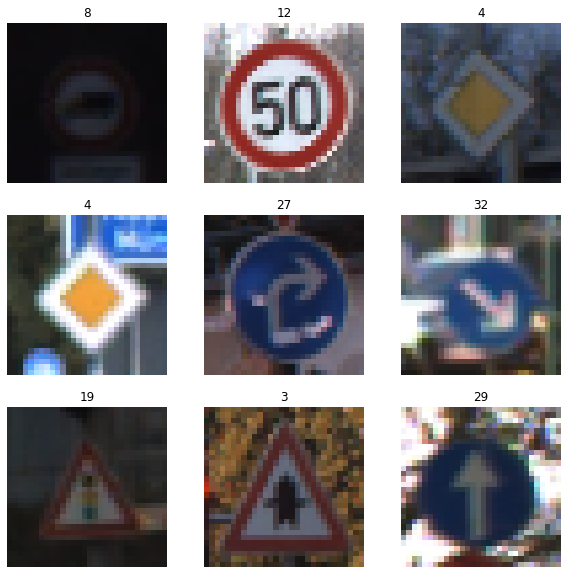

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    print(labels_batch[0])
    break

(32, 30, 30, 3)
(32,)
tf.Tensor(34, shape=(), dtype=int32)


## Deep Learning:

### Build a model
We start the model with the data_augmentation preprocessor, followed by a Rescaling layer.
We include a Dropout layer before the final classification layer.

In [14]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers import *

In [15]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu', 
                 input_shape = (30, 30, 3), data_format = 'channels_last',
                 kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(BatchNormalization())

# replace maxpooling with conv2d
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = "same", strides = (2, 2),
                kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 128, kernel_size = (5,5), activation = 'relu' ,
                 kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# replace maxpooling with conv2d
model.add(Conv2D(filters = 128, kernel_size = (5,5), padding = "same",
                 kernel_regularizer = tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3), strides = (2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1024, activation = 'relu',  kernel_regularizer= tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(Dropout(0.4))
model.add(Dense(256, activation = 'relu',  kernel_regularizer= tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax',  kernel_regularizer= tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        4864      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 9, 128)         512       
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)         0

### Training Model

In [16]:
callback = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',factor=1e-1, patience=8, verbose=1, min_lr = 2e-6)
opt = Adam(learning_rate = 1e-3)
model.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,  batch_size = 128, 
         epochs=5, validation_data = val_ds, verbose=1,
          callbacks=[callback, reduce_lr], shuffle = True) #SOLO PRUEBO.CAMBIAR EPOCH

Epoch 1/5
981/981 [==============================] - 88s 89ms/step - loss: 7.6709 - accuracy: 0.6976 - val_loss: 3.9613 - val_accuracy: 0.9088
Epoch 2/5
981/981 [==============================] - 87s 89ms/step - loss: 3.6250 - accuracy: 0.8636 - val_loss: 3.0528 - val_accuracy: 0.8992
Epoch 3/5
981/981 [==============================] - 87s 89ms/step - loss: 2.8547 - accuracy: 0.8929 - val_loss: 2.7019 - val_accuracy: 0.9299
Epoch 4/5
981/981 [==============================] - 88s 90ms/step - loss: 2.5827 - accuracy: 0.9042 - val_loss: 2.1299 - val_accuracy: 0.9653
Epoch 5/5
981/981 [==============================] - 88s 89ms/step - loss: 2.4022 - accuracy: 0.9086 - val_loss: 2.1725 - val_accuracy: 0.9457


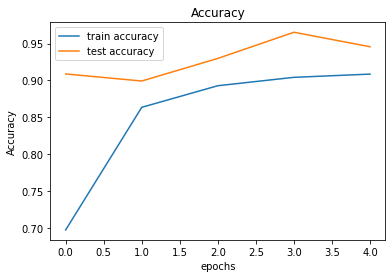

In [17]:
plt.figure(0)
plt.plot(history.history['accuracy'], label= 'train accuracy')
plt.plot(history.history['val_accuracy'], label= 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

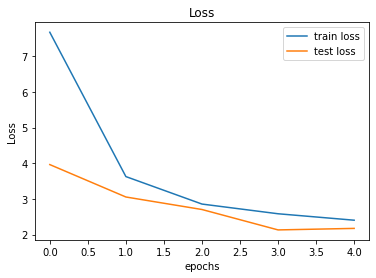

In [18]:
plt.figure(0)
plt.plot(history.history['loss'], label= 'train loss')
plt.plot(history.history['val_loss'], label= 'val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
### AQUI TENGO QUE PREGUNTAR.... NO ENTIENDO CÓMO VOY A SACAR EL CONJUNTO DE TEST PARA HACER LAS PREDICCIÓN?

### SVCLASSIFIER.... SOLO COMPARA DE DOS EN DOS??? TENGO QUE COMPARAR DE UNA CLASE CON OTRA?
### PARA QUE ME AYUDA HOG'????